In [1]:
import os
import pickle

from test import test
from train import train, train_for_count_test
from models import train_model_all_string
from models import get_next_tokens, test_model
from token_id_generator import TokenIdGenerator
from tokenizer import tokenize_java_code
from tree_node import TreeNode
from token_id_generator import TokenIdGenerator

**directory_train**, **directory_test** - пути к директориям с проетами JAVA разделенные на тренировочные и тестовые</br>
**max_file_count** - ограничение на количество обучающих файлов кода (нужно в связи с ограничением по памяти и времени) </br>
**max_tokens** - максимальное количество подряд идущих токенов которые будут записаны в дерево 

In [2]:
directory_train = os.getenv("PATH_TO_JAVA_CORPUS_TRAIN")
directory_test = os.getenv("PATH_TO_JAVA_CORPUS_TEST")
max_file_count = 500
max_tokens = range(1, 20, 1)

# Зависимость точности модели от количества токенов в дереве

Обучаем модель на разном количестве подряд идущих токенов и сохраняем модель для каждого значения

In [3]:
for x in max_tokens:
    result = train(
        directory_train, 
        train_model_all_string, 
        max_file_count=max_file_count,
        max_tokens=x
    )
    model_path = f"trained_models/tree{max_file_count}_{x}.pkl"
    id_generator_path = f"trained_models/id{max_file_count}_{x}.pkl"
    
    root_node = result["root_node"]
    id_generator = result["id_generator"]

    
    root_node.dump(model_path)
    id_generator.dump(id_generator_path)

processed files: 500
processed files: 500
processed files: 500
processed files: 500
processed files: 500
processed files: 500
processed files: 500
processed files: 500
processed files: 500
processed files: 500
processed files: 500
processed files: 500
processed files: 500
processed files: 500
processed files: 500
processed files: 500
processed files: 500
processed files: 500
processed files: 500


Тестируем модель и сохраняем результаты для отображения

In [4]:
data = []
for x in max_tokens:
    model_path = f"trained_models/tree{max_file_count}_{x}.pkl"
    id_generator_path = f"trained_models/id{max_file_count}_{x}.pkl"
    
    root_node = TreeNode("").load(model_path)
    id_generator = TokenIdGenerator().load(id_generator_path)        
    
    result = test(directory_test,
         root_node, 
         id_generator, 
         test_model, 
         max_file_count=20, 
         max_tokens=x
    )
    data.append([x,result["percent"]])


processed files 20: 0.0%
processed files 20: 13.75%
processed files 20: 18.29%
processed files 20: 20.15%
processed files 20: 20.25%
processed files 20: 20.6%%
processed files 20: 20.57%
processed files 20: 20.58%
processed files 20: 20.57%
processed files 20: 20.55%
processed files 20: 20.54%
processed files 20: 20.52%
processed files 20: 20.5%%
processed files 20: 20.52%
processed files 20: 20.53%
processed files 20: 20.54%
processed files 20: 20.56%
processed files 20: 20.57%
processed files 20: 20.55%


In [6]:
import matplotlib.pyplot as plt

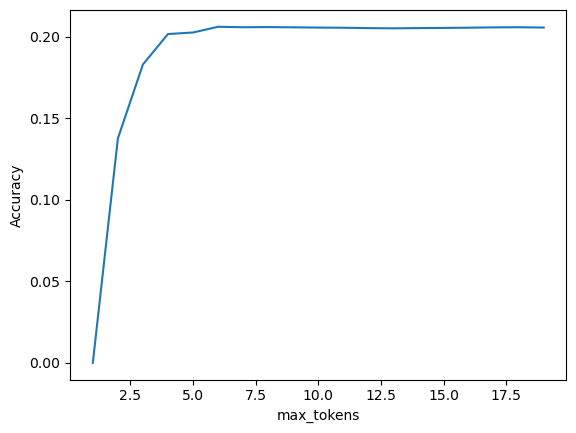

In [6]:
fig, ax = plt.subplots()

x = [i[0] for i in data]
y = [i[1] for i in data]
    
ax.plot(x, y)

ax.set(xlabel='max_tokens', ylabel='Accuracy')

plt.show()

# Зависимость точности модели от количества обучающих файлов

In [3]:
directory_train = os.getenv("PATH_TO_JAVA_CORPUS_TRAIN")
directory_test = os.getenv("PATH_TO_JAVA_CORPUS_TEST")
max_file_count = list(range(100, 500, 100)) +  list(range(500,5001, 500))
max_tokens = 5

In [4]:
result = train_for_count_test(
    directory_train, 
    train_model_all_string, 
    max_file_count=max_file_count,
    max_tokens=max_tokens
)


processed files: 100
Dump: trained_models/tree100_5.pkl, trained_models/id100_5.pkl
processed files: 201
Dump: trained_models/tree200_5.pkl, trained_models/id200_5.pkl
processed files: 300
Dump: trained_models/tree300_5.pkl, trained_models/id300_5.pkl
processed files: 400
Dump: trained_models/tree400_5.pkl, trained_models/id400_5.pkl
processed files: 500
Dump: trained_models/tree500_5.pkl, trained_models/id500_5.pkl
processed files: 1004
Dump: trained_models/tree1000_5.pkl, trained_models/id1000_5.pkl
processed files: 1501
Dump: trained_models/tree1500_5.pkl, trained_models/id1500_5.pkl
processed files: 2008
Dump: trained_models/tree2000_5.pkl, trained_models/id2000_5.pkl
processed files: 2506
Dump: trained_models/tree2500_5.pkl, trained_models/id2500_5.pkl
processed files: 3003
Dump: trained_models/tree3000_5.pkl, trained_models/id3000_5.pkl
processed files: 3511
Dump: trained_models/tree3500_5.pkl, trained_models/id3500_5.pkl
processed files: 4010
Dump: trained_models/tree4000_5.pkl,

In [8]:
data_file_count = []
for x in max_file_count:
    model_path = f"trained_models/tree{x}_{max_tokens}.pkl"
    id_generator_path = f"trained_models/id{x}_{max_tokens}.pkl"
    
    root_node = TreeNode("").load(model_path)
    id_generator = TokenIdGenerator().load(id_generator_path)        
    
    result = test(directory_test,
         root_node, 
         id_generator, 
         test_model, 
         max_file_count=20, 
         max_tokens=max_tokens,
    )
    data_file_count.append([x,result["percent"]])


processed files 20: 17.76%
processed files 20: 18.81%
processed files 20: 19.21%
processed files 20: 19.38%
processed files 20: 20.25%
processed files 20: 29.48%
processed files 20: 35.49%
processed files 20: 36.88%
processed files 20: 37.02%
processed files 20: 38.16%
processed files 20: 38.54%
processed files 20: 38.32%
processed files 20: 38.19%
processed files 20: 38.14%


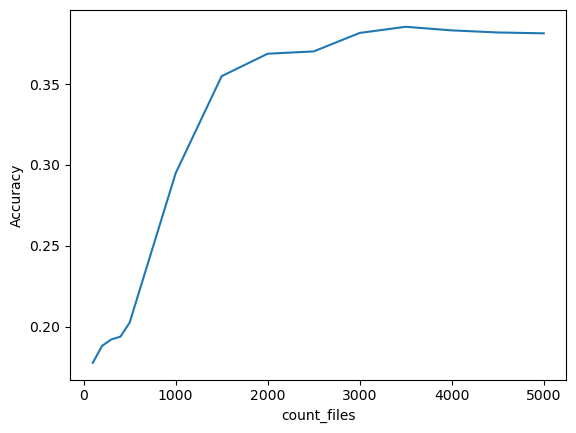

In [9]:
fig, ax = plt.subplots()

x = [i[0] for i in data_file_count]
y = [i[1] for i in data_file_count]

ax.plot(x, y)

ax.set(xlabel='count_files', ylabel='Accuracy')

plt.show()

In [10]:
directory_train = os.getenv("PATH_TO_JAVA_CORPUS_TRAIN")
directory_test = os.getenv("PATH_TO_JAVA_CORPUS_TEST")
max_file_count = list(range(100, 500, 100)) +  list(range(500,5001, 1000))
max_tokens = 5

Совпадения ходя бы одного из 5 предложенных токенов

In [11]:
data_file_count_top_5 = []
for x in max_file_count:
    model_path = f"trained_models/tree{x}_{max_tokens}.pkl"
    id_generator_path = f"trained_models/id{x}_{max_tokens}.pkl"
    
    root_node = TreeNode("").load(model_path)
    id_generator = TokenIdGenerator().load(id_generator_path)        
    
    result = test(directory_test,
         root_node, 
         id_generator, 
         test_model, 
         max_file_count=20, 
         max_tokens=max_tokens,
         top_n=5
    )
    data_file_count_top_5.append([x,result["percent"]])


processed files 20: 27.61%
processed files 20: 29.05%
processed files 20: 29.66%
processed files 20: 30.59%
processed files 20: 31.12%
processed files 20: 51.09%
processed files 20: 52.69%
processed files 20: 53.79%
processed files 20: 53.82%


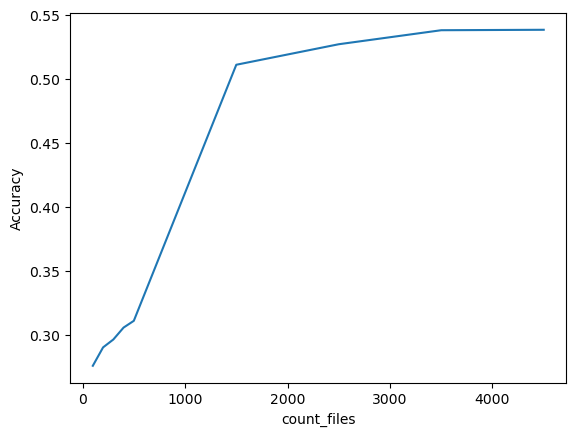

In [12]:
fig, ax = plt.subplots()

x = [i[0] for i in data_file_count_top_5]
y = [i[1] for i in data_file_count_top_5]

    
ax.plot(x, y)

ax.set(xlabel='count_files', ylabel='Accuracy')

plt.show()